# Test Case - Renfe data for 6th of September 2023, Corridor Madrid - Barcelona

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys

from pathlib import Path

sys.path.append('..')

SAVE_PATH = Path('../reports/figures/test_case/base')
os.makedirs(SAVE_PATH, exist_ok=True)

## Simulate Passengers Demand

In [3]:
from src.robin.kernel.entities import Kernel

path_config_supply = Path('../configs/test_case/supply_data.yml')
path_config_demand = Path('../configs/test_case/demand_data.yml')
path_output_csv = Path('../data/test_case/output.csv')

os.makedirs(Path('../data/test_case'), exist_ok=True)
seed = 0

kernel = Kernel(path_config_supply, path_config_demand, seed)
services = kernel.simulate(output_path=path_output_csv, departure_time_hard_restriction=True)

## Plot Results

In [4]:
from src.robin.plotter.entities import KernelPlotter

kernel_plotter = KernelPlotter(
    path_output_csv=path_output_csv,
    path_config_supply=path_config_supply,
)

In [5]:
kernel_plotter.plotter_data_analysis()

Data from demand plot: 
	Status: User found  any service that met his needs but couldn't purchase. - Passengers: 4672
	Status: User bought the ticket with best utility. - Passengers: 1285
	Status: User bought a service which was not the one with the best utility. - Passengers: 1125
	Status: User didn't find any ticket that met his needs. - Passengers: 14

Data from pie chart: 
	Total tickets sold:  2410
	Percentage of tickets sold by seat type: 
		Seat: Basico - Passengers: 2007 - Percentage: 83.28 %
		Seat: Elige - Passengers: 101 - Percentage: 4.19 %
		Seat: Premium - Passengers: 302 - Percentage: 12.53 %

Data from plot tickets sold by purchase day: 
	Total tickets sold:  2410
	Tickets sold by purchase date and seat type: 
		Date: 2023-05-25
			Seat: Premium - Number of tickets sold: 1
		Date: 2023-05-26
			Seat: Basico - Number of tickets sold: 2
			Seat: Premium - Number of tickets sold: 5
		Date: 2023-05-27
			Seat: Basico - Number of tickets sold: 2
			Seat: Elige - Number of ti

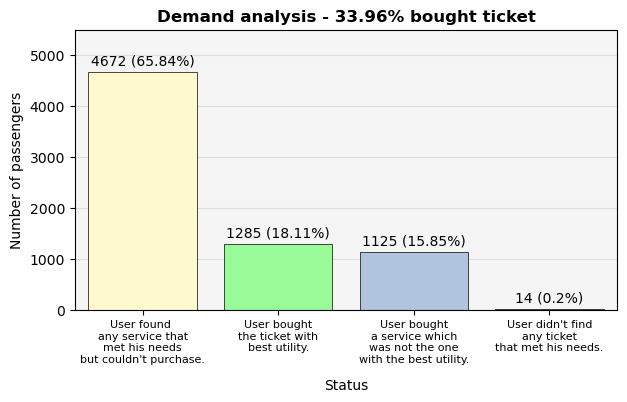

In [6]:
kernel_plotter.plot_demand_status(y_limit=5500, save_path=f'{SAVE_PATH}/demand_status.pdf')

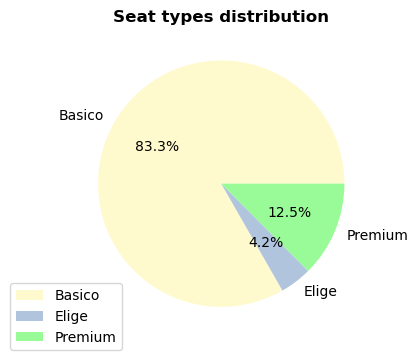

In [7]:
kernel_plotter.plot_seat_distribution_pie_chart(save_path=f'{SAVE_PATH}/pie.pdf')

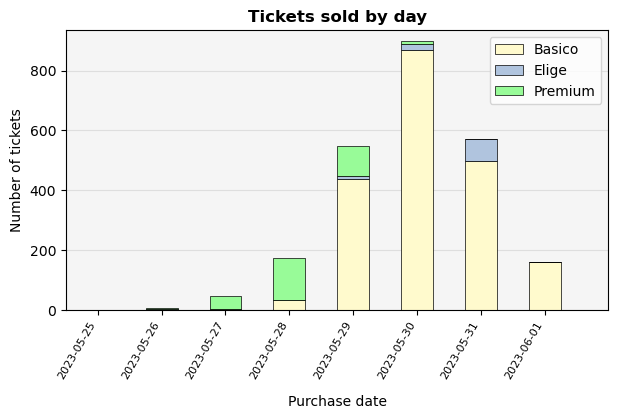

In [8]:
kernel_plotter.plot_tickets_by_date(y_limit=850, save_path=f'{SAVE_PATH}/total_tickets_sold.pdf')

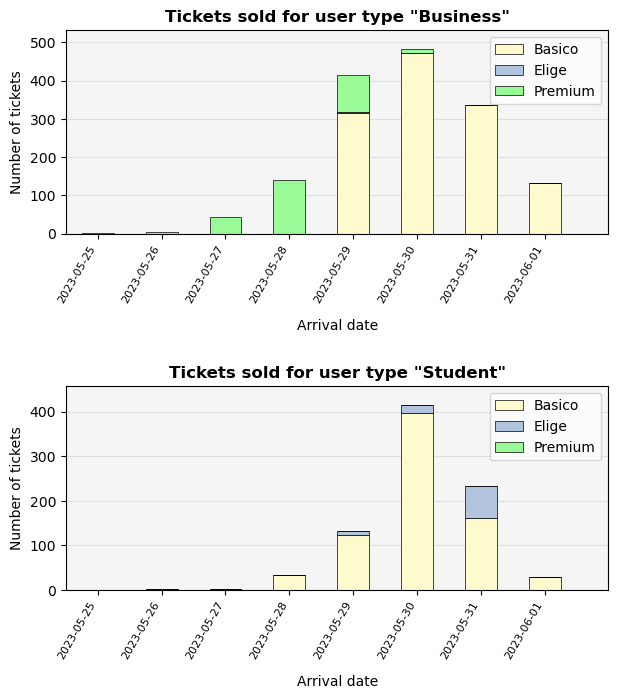

In [9]:
kernel_plotter.plot_tickets_by_user(save_path=f'{SAVE_PATH}/tickets_sold_per_usertype.pdf')

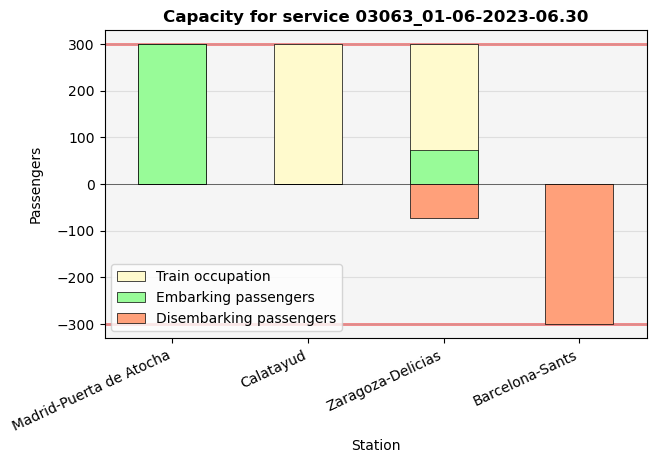

In [10]:
kernel_plotter.plot_service_capacity(
    service_id='03063_01-06-2023-06.30',
    save_path=f'{SAVE_PATH}/capacity_03063_06-09-2023-06.30.pdf'
)

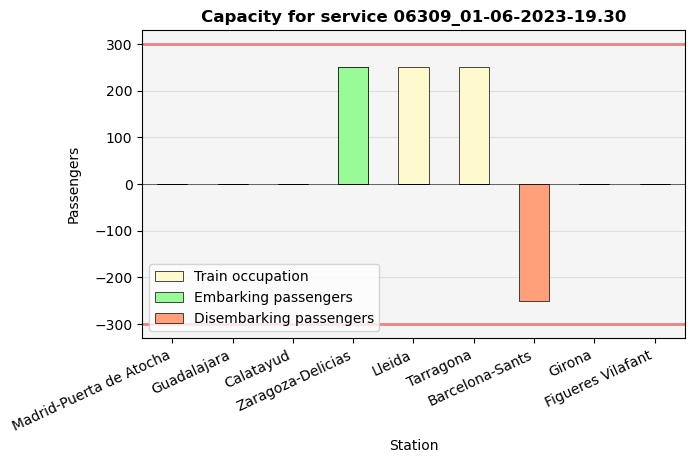

In [11]:
kernel_plotter.plot_service_capacity(
    service_id='06309_01-06-2023-19.30',
    save_path=f'{SAVE_PATH}/capacity_06309_06-09-2023-19.30.pdf'
)

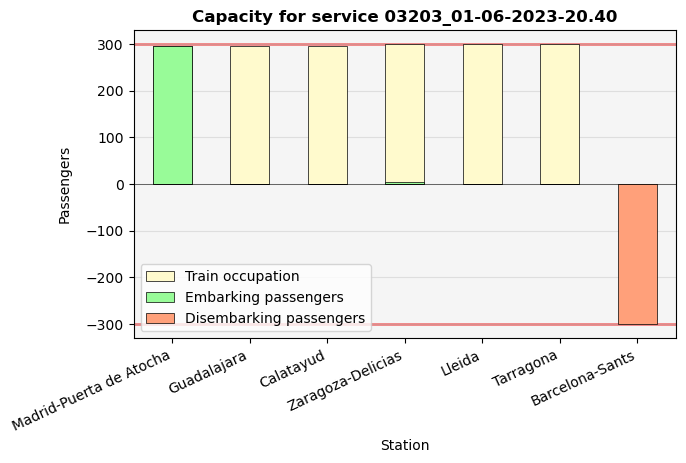

In [12]:
kernel_plotter.plot_service_capacity(
    service_id='03203_01-06-2023-20.40',
    save_path=f'{SAVE_PATH}/capacity_03203_01-06-2023-20.40.pdf'
)

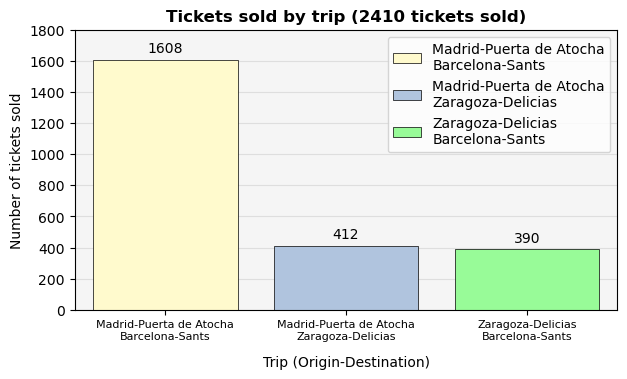

In [13]:
kernel_plotter.plot_tickets_by_pair(y_limit=1800, save_path=f'{SAVE_PATH}/pairs.pdf')

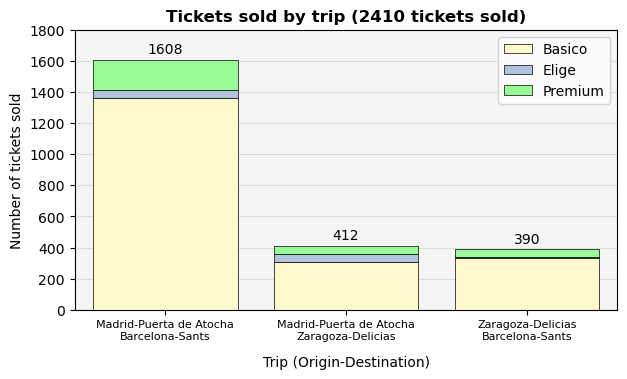

In [14]:
kernel_plotter.plot_tickets_by_pair(y_limit=1800, save_path=f'{SAVE_PATH}/pairs_disaggregated.pdf', seat_disaggregation=True)
